<a href="https://colab.research.google.com/github/Preetirai-tech/Online-Retail-Customer-Segmentation-Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Online Retail Customer Segmentation**



## **Project Type**    - **Unsupervised**
## **Contribution**    - **Preeti Rai (Individual)**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Preetirai-tech/Online-Retail-Customer-Segmentation-Project

# **Index**

## **In this project, We will do**

1. Problem Statement
2. Know Your Data
3. Understanding Your Variables
4. EDA
5. Data Cleaning
6. Feature Engineering
7. Model Building
8. Model Implementation
9. Conclusion

# ***Let's Begin !***

# **1. Problem Statement**


**The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.**

# **2. Know Your Data**

### Import Libraries

In [ ]:
# Import Libraries
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load Dataset
retail_df = pd.read_excel("/content/drive/MyDrive/AlmaBetter/Capstone Project/Unsupervised/Online Retail.xlsx")

### Dataset First View

In [ ]:
# Display the first 5 rows of the dataset
retail_df.head()

In [ ]:
# Display the last 5 rows of the dataset
retail_df.tail()

In [10]:
# Sample of the dataset
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
360099,568211,22398,MAGNETS PACK OF 4 SWALLOWS,12,2011-09-25 15:59:00,0.39,13429.0,United Kingdom
20936,538071,22210,WOOD STAMP SET BEST WISHES,1,2010-12-09 14:09:00,3.36,NaN,United Kingdom
319692,564860,85159B,"WHITE TEA,COFFEE,SUGAR JARS",12,2011-08-31 10:06:00,1.95,17725.0,United Kingdom
459149,575867,22952,60 CAKE CASES VINTAGE CHRISTMAS,6,2011-11-11 12:44:00,0.55,15034.0,United Kingdom
412135,572280,22621,TRADITIONAL KNITTING NANCY,4,2011-10-23 11:05:00,1.65,16007.0,United Kingdom


### Dataset Rows & Columns count

In [11]:
# Dimension of the datasets
rows, columns = retail_df.shape
print(f'The dataset has', rows, 'rows and', columns, 'columns')

The dataset has 541909 rows and 8 columns


## Columns

In [12]:
# The total number of columns in the dataset

print('The total number of columns in the dataset: ', retail_df.shape[1], '\nThese are:')

count = 1
for col in retail_df.columns.to_list():
  print(count,'.', col)
  count += 1


The total number of columns in the dataset:  8 
These are:
1 . InvoiceNo
2 . StockCode
3 . Description
4 . Quantity
5 . InvoiceDate
6 . UnitPrice
7 . CustomerID
8 . Country


### Dataset Information

In [13]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


**The dataset contains 541909 rows and 8 columns.**


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
dup = retail_df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


#### Missing Values/Null Values

In [15]:
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing
round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

CustomerID     24.93
Description     0.27
dtype: float64

In [16]:
# Missing Values/Null Values Count
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


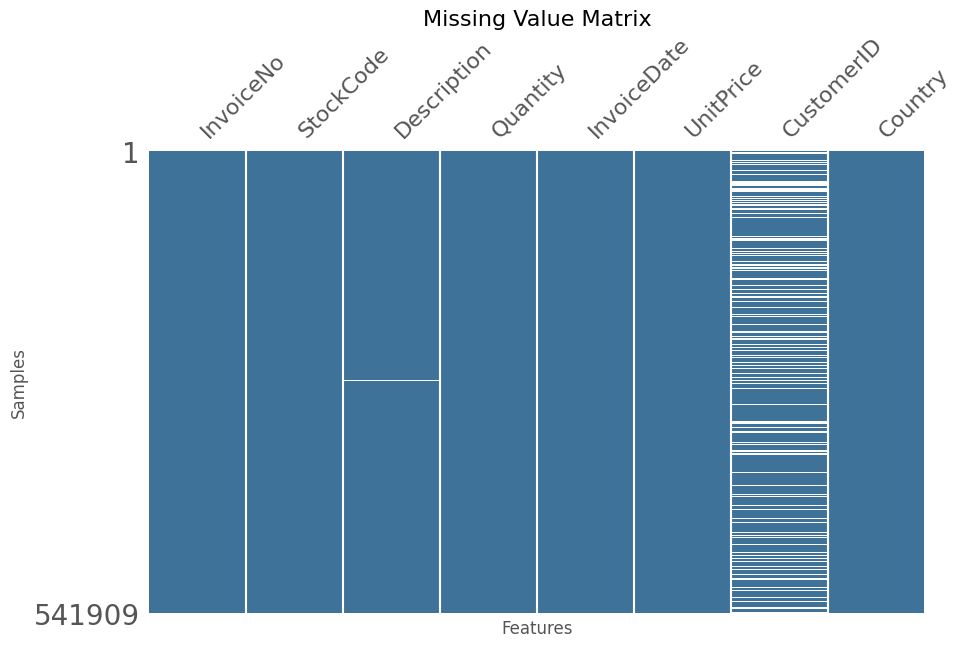

In [17]:
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()
     

**Observation:**
- 24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

### What did you know about your dataset?

- **The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**
- **The company mainly sells unique all-occassion gifts.**
- **Many customers of the company are wholesalers.**
- **The dataset contains 541909 rows and 8 columns.**
- **There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.**
- **The total number of duplicated values in the dataset: 5268**
- **Missing Data Percentage**
     - **CustomerID -    24.93%**
     - **Description -     0.27%**

## **3. Understanding Your Variables**

In [ ]:
# Dataset Columns
retail_df.columns

In [ ]:
# Statistical summary of the dataset
retail_df.describe().T


### Variables Description 

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in retail_df.columns.tolist():
  print("Number of unique values in",i,"is",retail_df[i].nunique())

## 4. **Exploratory Data Analysis**

**What is EDA?**

- EDA stands for Exploratory Data Analysis. It is a crucial step in the data analysis process that involves exploring and understanding the characteristics, patterns, and relationships within a dataset. EDA aims to uncover insights, identify patterns, detect outliers, and gain a deeper understanding of the data before conducting further analysis or modeling.

## **Top Selling products**

In [ ]:
# Creat a dataframe without cancelled ordered
temp_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 products
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Create the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product


In [ ]:
import random
# Generate a list of random colors
#color = [tuple(random.random() for i in range(3)) for j in range(len(top_product))]

# Plot bar chart
plt.figure(figsize = (15, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()


- A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

- This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

- Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

##**Least Selling Products**

In [ ]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

In [ ]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Create the dataframe containing the top 10 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products


In [ ]:
# Plot the top 10 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title 
plt.title('Top 10 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

- A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures.

- The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sales.

- The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

In [ ]:
retail_df.info()

## **Top Customers**

In [ ]:
# Create dataframe containing only top 5 customers
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

top_customers



In [ ]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'CustomerID', y = 'Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');


- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

- The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

- Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

## **Top Countries**

In [ ]:
# Create a dataframe containing countries count
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})

# Display top 5 countries
countries.head()

In [ ]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = countries[:5], x = 'Country', y = 'Count')

# Add labels and a title
plt.title('Top 5 Countries', fontsize = 16, fontweight = 'bold')
#plt.xlabel('Country')
plt.ylabel('Frequency');

- A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

- The chart provides insight that the most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain.

- Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

# **5. Data Cleaning**

**What is data cleaning?**

Data cleaning, also known as data cleansing or data scrubbing, refers to the process of identifying and correcting or removing errors, inconsistencies, and inaccuracies in a dataset. It involves handling missing data, removing duplicates, addressing outliers, standardizing formats, resolving inconsistencies, and validating data. Data cleaning ensures that the data is accurate, complete, and reliable for analysis or machine learning purposes.

## **5.1 Handling Missing Values**

In [21]:
# Missing value
print(retail_df.isnull().sum())

# Missing value percentage

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [22]:
# Check for duplicates in the retail dataframe
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


In [23]:
# Create a copy of the original dataframe
df = retail_df.copy()

In [28]:
# Remove all rows with missing values in CustomerID column.
df.dropna(subset = ['CustomerID'], how = 'all', inplace = True)

# Check for any missing values in the dataset
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

- This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.
- There is no missing values in the dataset. We are good to go.

In [29]:
# Check the dimension of the dataset after removing missing values
df.shape

(406829, 8)

## **5.2 Handling duplicate values**

In [31]:
# Check for duplicate values in the dataset
df.duplicated().sum()

5225

In [36]:
# Drop all the duplicate values in the dataset
df.drop_duplicates(inplace = True)

# Check for any duplicate values in the dataset
df.duplicated().sum()

0

**There is no duplicated values in the dataset. We are good to go.**

In [37]:
# Check the dimension of the dataset after removing duplicated
df.shape

(401604, 8)

## **5.3 Removing the Cancelled order**

In [43]:
# Remove all the rows that starts with 'C' in InvoiceNo. Here, 'C' stands for cancellation
df = df[~df['InvoiceNo'].astype(str).str.contains('C')]

# Check the dimension of the dataframe
df.shape

(392732, 8)

# **6. Feature Engineering**

In [45]:
# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [46]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalCost
210605,555284,15034,PAPER POCKET TRAVELING FAN,240,2011-06-02 09:37:00,0.07,14298.0,United Kingdom,16.80
369273,569024,22111,SCOTTIE DOG HOT WATER BOTTLE,3,2011-09-30 10:04:00,4.95,12822.0,United Kingdom,14.85
17029,537672,21217,RED RETROSPOT ROUND CAKE TINS,2,2010-12-08 09:30:00,9.95,13050.0,United Kingdom,19.90
275666,561001,21167,WHITE SAGE INCENSE,72,2011-07-22 14:23:00,0.21,16711.0,United Kingdom,15.12
159047,550322,20725,LUNCH BAG RED RETROSPOT,1,2011-04-17 12:53:00,1.65,14524.0,United Kingdom,1.65


In [52]:
# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

# **6. RFM Analysis**

**RFM analysis** is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:

- Recency (R): Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

- Frequency (F): Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

- Monetary Value (M): Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchases.

## **6.1 Recency**

**Recency = Latest InvoiceDate - Last InoviceData**

In [62]:
# Group the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [64]:
latest_date = df['Date'].max()

print(latest_date)


2011-12-09


In [74]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [76]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Now we have the recency attribute created e.g: Customer with ID = 12346 did his/her last purshace 325 days ago.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***